In [2]:
import librosa
import pandas as pd
import os
import numpy as np

In [6]:
facial_labels = pd.read_csv("C:\\MITT\Labels\\turker_scores_full_interview.csv")

# KEEPING ONLY AVG OF EACH PARTICIPANT
facial_labels = facial_labels[facial_labels['Worker'] == 'AGGR']
facial_labels.head()

# KEEPING THE AUDIO LABELS
Audio_labels = facial_labels.iloc[:,[0, 6, 9, 10, 12, 13, 14, 15]].copy()
Audio_labels.head()

,Participant,Excited,SpeakingRate,NoFillers,Paused,EngagingTone,StructuredAnswers,Calm
9,p1,5.043890,4.865590,3.771665,5.800468,5.147909,4.891580,5.351075
19,p3,5.601586,5.016286,3.332458,4.791550,5.621231,3.912199,4.476537
29,p4,4.261343,4.738000,3.111445,5.177447,4.392736,4.688379,5.065190
39,p5,4.707062,4.927181,5.881741,5.886326,4.695523,5.582514,6.130488
49,p6,4.648259,4.174891,3.920329,5.027823,4.261988,4.826245,5.828977


In [15]:
# Function to extract audio features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio file

    # Extract features (you may need to customize this based on your requirements)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr) # USED TO UNDERSTAND THE TONE OF AUDIO
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Concatenate features into a single array
    features = np.concatenate([mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)])

    return features

# Function to process a directory of audio files and labels
def process_data(audio_dir):
    # Load labels
    labels_df = Audio_labels

    # Create an empty DataFrame to store features and labels
    data = pd.DataFrame()
    count = 0

    # Process each audio file in the directory
    for file_name in os.listdir(audio_dir):
        if file_name.endswith(".wav"):
            file_path = file_name
            count += 1

            # Extract features
            features = extract_features(file_path)

            # Find corresponding labels
            participant_labels = labels_df[labels_df['Participant'] == (file_name.split('.')[0]).lower()]

            # Combine features and labels into a single row
            row = pd.DataFrame([features], columns=[f'feature_{i}' for i in range(len(features))])
            row = pd.concat([row, participant_labels.reset_index(drop=True)], axis=1)

            # Append the row to the main DataFrame
            data = data.append(row, ignore_index=True)

            if count == 30:
                break

    return data

# Example usage
audio_directory = './'

processed_data = process_data(audio_directory)
processed_data.head()
# Save processed data to a CSV file
processed_data.to_csv('processed_data.csv', index=False)


C:\Users\inspi\AppData\Local\Temp\ipykernel_9376\3668962306.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\inspi\AppData\Local\Temp\ipykernel_9376\3668962306.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\inspi\AppData\Local\Temp\ipykernel_9376\3668962306.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\inspi\AppData\Local\Temp\ipykernel_9376\3668962306.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\inspi\AppDa

In [ ]:
loaded_data = pd.read_csv('processed_data.csv')

In [69]:
label_columns = ['Excited', 'SpeakingRate', 'NoFillers', 'Paused', 'EngagingTone', 'StructuredAnswers', 'Calm']
feature_columns = [col for col in processed_data.columns if col.startswith('feature_')]

In [72]:
print(label_columns)
print(feature_columns)
print(processed_data.shape)

['Excited', 'SpeakingRate', 'NoFillers', 'Paused', 'EngagingTone', 'StructuredAnswers', 'Calm']
['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31']
(30, 40)


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


label_columns = ['Excited', 'SpeakingRate', 'NoFillers', 'Paused', 'EngagingTone', 'StructuredAnswers', 'Calm']
feature_columns = [col for col in processed_data.columns if col.startswith('feature_')]


X = processed_data[feature_columns]
y = processed_data[label_columns]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZE THE DATA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the neural network model (you can adjust parameters)
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6.467344796932934


## TESTING

In [81]:
test = [-424.7814636,123.7903519,22.73874283,11.39244747,13.34179497,19.45232582,-5.067294121,0.548816621,-0.184938088,-3.711682796,-14.20636082,-9.866271973,-5.8155303,0.438320071,0.44007659,0.456340194	,0.43872416	,0.378071666,	0.389151603	,0.400900275,	0.496566057	,0.617342889	,0.568003356	,0.505162954	,0.467165798	,13.28869868	,11.35917315	,15.8732181,	14.5953203	,16.19788003	,16.69050962	,32.25586801
]
test = np.array(test)
test= scaler.transform(test.reshape(1, -1))
result = model.predict(test)

import pandas as pd

# Assuming 'result' is your predicted values array
result_df = pd.DataFrame(result, columns=label_columns)

print("Predicted Results:")
print(result_df)


Predicted Results:
   Excited  SpeakingRate  NoFillers    Paused  EngagingTone  \
0  4.38302       4.78152   2.780262  5.649702      4.768164   

   StructuredAnswers      Calm  
0           3.558595  4.490622  


c:\Users\inspi\miniconda3\envs\dl\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


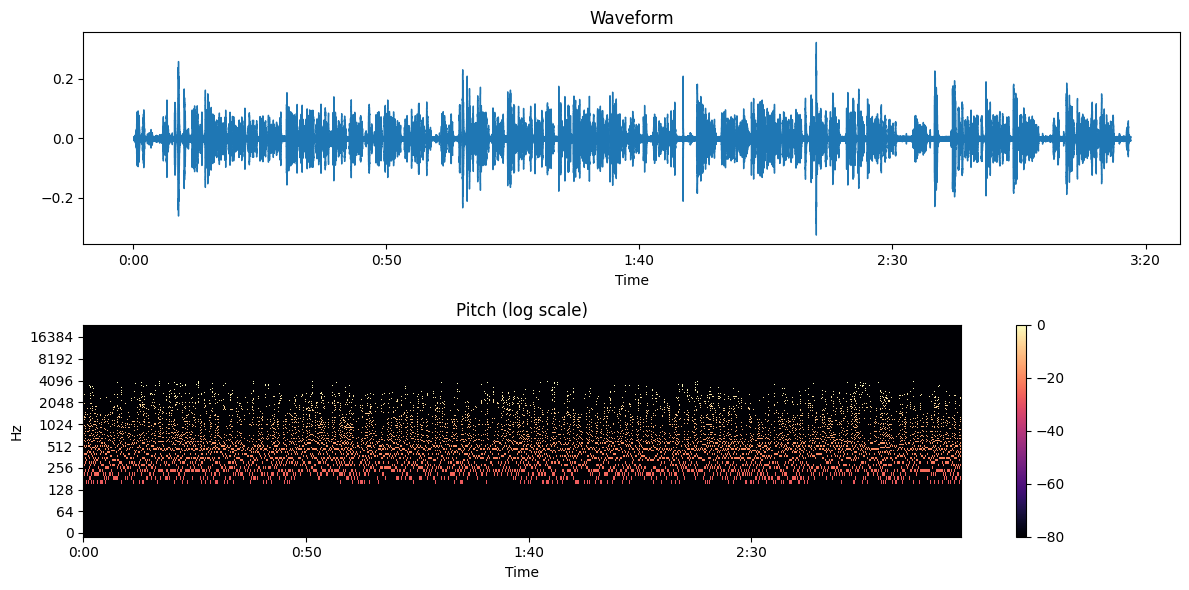

In [60]:
import librosa.display
import matplotlib.pyplot as plt

# Function to plot pitch and amplitude graphs
def plot_pitch_amplitude(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Calculate pitch
    pitches, magnitudes = librosa.core.pitch.piptrack(y=y, sr=sr)

    # Plot waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')

    # Plot pitch
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(pitches, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Pitch (log scale)')
    
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'P1.wav'
plot_pitch_amplitude(file_path)


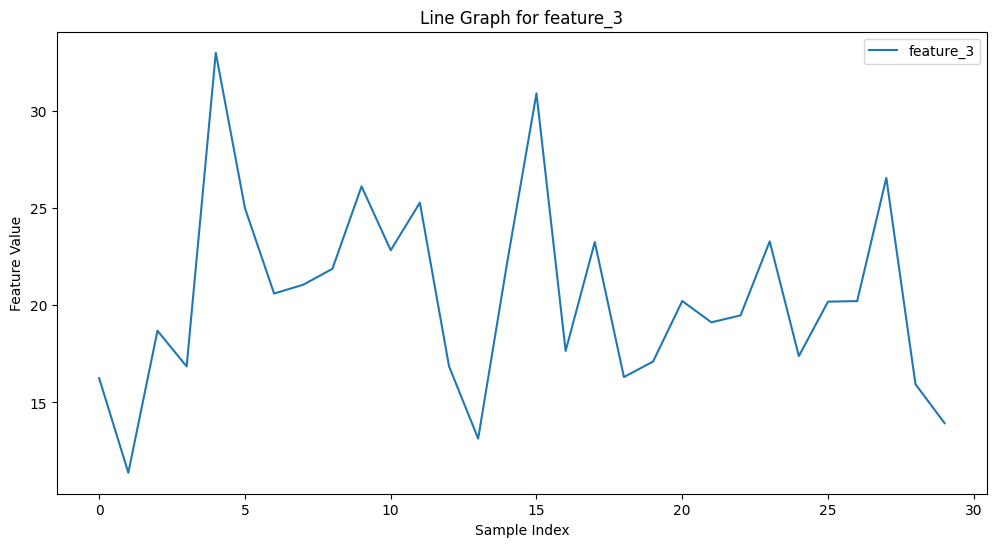

In [62]:
import matplotlib.pyplot as plt

# Choose a feature column to plot (replace 'feature_0' with the desired feature)
feature_to_plot = 'feature_3'

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(processed_data[feature_to_plot], label=feature_to_plot)
plt.title(f'Line Graph for {feature_to_plot}')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


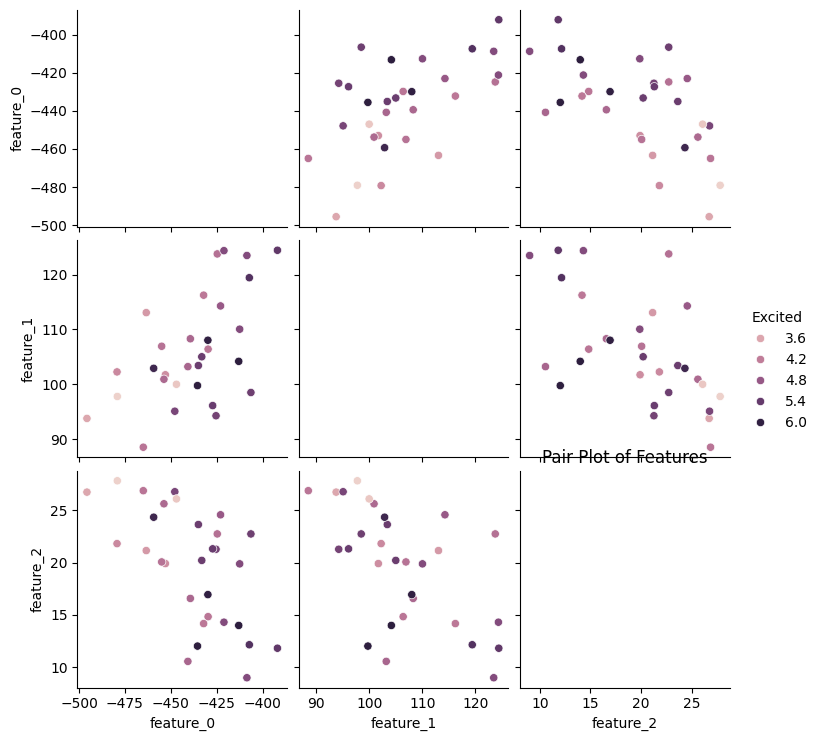

In [65]:
import seaborn as sns

# Assuming 'processed_data' is the DataFrame obtained from your code
sns.pairplot(processed_data, hue='Excited', vars=['feature_0', 'feature_1', 'feature_2'])
plt.title('Pair Plot of Features')
plt.show()


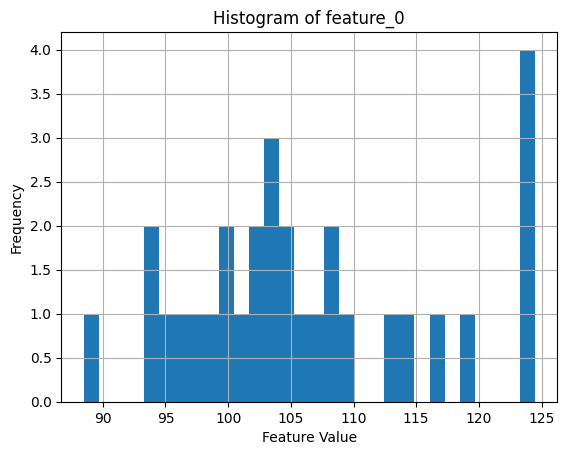

In [68]:
# Assuming 'processed_data' is the DataFrame obtained from your code
processed_data['feature_1'].hist(bins=30)
plt.title('Histogram of feature_0')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()


In [63]:
print(label_columns)


['Excited', 'SpeakingRate', 'NoFillers', 'Paused', 'EngagingTone', 'StructuredAnswers', 'Calm']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Features
X = processed_data[feature_columns]

# Labels
y = processed_data[label_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate SVM classifiers for each label
svm_classifiers = {}
for column in label_columns:
    classifier = SVC(kernel='linear', C=1)
    classifier.fit(X_train, y_train[column])
    svm_classifiers[column] = classifier

# Make predictions on the test set
y_pred = pd.DataFrame({column: classifier.predict(X_test) for column, classifier in svm_classifiers.items()})

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

ValueError: Unknown label type: 'continuous'

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming 'processed_data' contains both features and labels
# Replace this with your actual variable name
# Ensure that 'processed_data' includes columns for features and label_columns

# Features
X = processed_data[feature_columns]

# Labels
y = processed_data[label_columns]

print("X shape:", X.shape)
print("y shape:", y.shape)

# Transpose y to correct the shape
y = y.T

# Use MultiLabelBinarizer for multi-label encoding
label_binarizer = MultiLabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)


# Ensure features and labels have the same number of samples
if X.shape[0] != y_encoded.shape[0]:
    raise ValueError("Inconsistent number of samples between features and labels.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train separate SVM classifiers for each label
svm_classifiers = []
for i in range(y_encoded.shape[1]):
    classifier = SVC(kernel='linear', C=1)
    classifier.fit(X_train, y_train[:, i])
    svm_classifiers.append(classifier)

# Additional print statements for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Make predictions on the test set
y_pred = np.column_stack([classifier.predict(X_test) for classifier in svm_classifiers])

# Additional print statements for debugging
print("y_pred shape:", y_pred.shape)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_binarizer.classes_))


X shape: (30, 32)
y shape: (30, 7)


TypeError: 'int' object is not iterable

In [41]:
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)


print("X head:\n", X.head())
print("y_encoded head:\n", y_encoded)



X shape: (30, 32)
y_encoded shape: (30, 7)
X head:
     feature_0   feature_1  feature_2  feature_3  feature_4  feature_5  \
0 -408.663757  123.502975   8.993340  16.245831   4.381235  26.798620   
1 -424.781464  123.790352  22.738743  11.392447  13.341795  19.452326   
2 -429.773804  106.397491  14.829667  18.687248   0.655626  20.271595   
3 -435.065399  103.400993  23.634666  16.852364   2.077060  19.092321   
4 -495.674042   93.742447  26.733210  32.968803   3.387098  26.335258   

   feature_6  feature_7  feature_8  feature_9  ...  feature_22  feature_23  \
0 -17.739597   2.715007  -7.102474  -1.583574  ...    0.509186    0.591091   
1  -5.067294   0.548817  -0.184938  -3.711683  ...    0.568003    0.505163   
2 -16.557795   9.696036 -11.969558  -1.802987  ...    0.360512    0.353132   
3  -8.149246   4.095767  -4.935740  -1.671262  ...    0.496349    0.427869   
4  -8.816983   8.924696 -12.312177   6.505525  ...    0.530322    0.478882   

   feature_24  feature_25  feature_26  f

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming 'processed_data' contains both features and labels
# Replace this with your actual variable name
# Ensure that 'processed_data' includes columns for features and label_columns

# Features
X = processed_data[feature_columns]

# Labels
y = processed_data[label_columns]

# Use MultiLabelBinarizer for multi-label encoding
label_binarizer = MultiLabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

# Ensure features and labels have the same number of samples
if X.shape[0] != y_encoded.shape[0]:
    raise ValueError("Inconsistent number of samples between features and labels.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train separate SVM classifiers for each label
svm_classifiers = []
for i in range(y_encoded.shape[1]):
    classifier = SVC(kernel='linear', C=1)
    classifier.fit(X_train, y_train[:, i])
    svm_classifiers.append(classifier)

# Make predictions on the test set
y_pred = np.column_stack([classifier.predict(X_test) for classifier in svm_classifiers])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_binarizer.classes_))


ValueError: Inconsistent number of samples between features and labels.